In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('L0001.csv')


#X = df[['x', 'y']] 
#y = df['MPArea'] 

df.head()

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750,0.009,0.0,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760,0.009,0.0,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770,0.009,0.0,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780,0.009,0.0,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790,0.009,0.0,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111


In [4]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

df = pd.read_csv('L0001.csv')

def c_par(par1, par2, par3, nc):

    df.fillna(0, inplace=True) #all NaN values become 0's

    X = df[[par2, par1]]
    kmeans = KMeans(n_clusters = nc, random_state=0)
    kmeans.fit(X)

   # centroids = kmeans.cluster_centers_
    predicted_clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_



    # Extract parameters from the dataset
    param1 = df[par1]
    param2 = df[par2]
    param3 = df[par3]

    # Plotting the first graph (param1 vs param2)
    plt.figure(figsize=(12.5, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=param2, y=param1, hue=predicted_clusters, data=df, palette='viridis', s=100, alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=100, color='red', label='Centroids')
    plt.xlabel(par2)
    plt.ylabel(par1)
    plt.title(f'Comparison of {par1} vs {par2}')
    plt.legend()
    plt.legend(loc='best', prop={'size': 7.5})


    X1 = df[[par3, par1]]
    kmeans1 = KMeans(n_clusters = nc, random_state=12)
    kmeans1.fit(X1)

    centroids1 = kmeans1.cluster_centers_
    predicted_clusters1 = kmeans1.labels_


    # Plotting the second graph (param1 vs param3)
    plt.subplot(1, 2, 2)
    #plt.scatter(x=param1, y=param3, color='red', label=f'{par1} vs {par3}')
    sns.scatterplot(x=param3, y=param1, hue=predicted_clusters1, data=df, palette='viridis', s=100, alpha=0.8)
    plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='o', color='red', s=100, label='Centroids')
    plt.xlabel(par3)
    plt.ylabel(par1)
    plt.title(f'Comparison of {par1} vs {par3}')
    plt.legend()
    plt.legend(loc='best', prop={'size': 7.5})

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()



#colors on first graph are very light
#PARA1 - x axis both graphs
#PARA2 - y axis first graph
#PARA3 - y axis second graph
#nc - number of clusters
    
#NaN Values become 0's

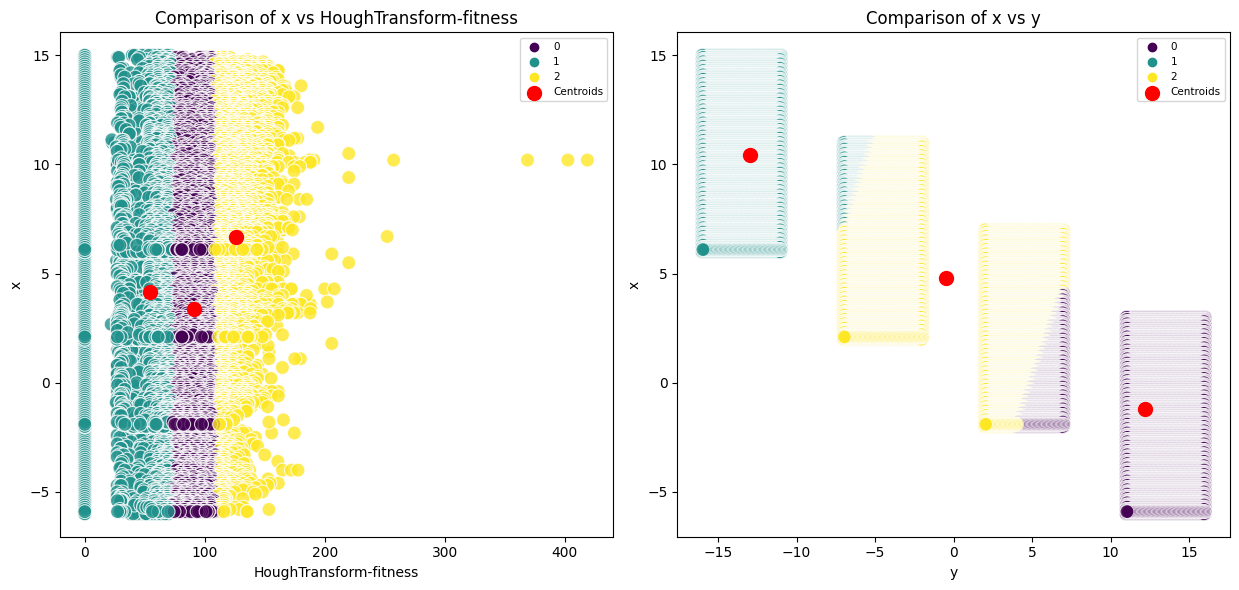

In [6]:
c_par('x', 'HoughTransform-fitness', 'y', 3)